# Normalize an image using the following steps:

    * Loads an image in grayscale mode using OpenCV.
    * Converts the image to floating point representation for calculations.
    * Calculates the minimum and maximum pixel values in the image.
    * Normalizes the image using the formula round((image_float - min_val) / (max_val - min_val))*R.  if R=128, it will normalized image to [0-127] range.
    * Displays the original and normalized images using OpenCV.

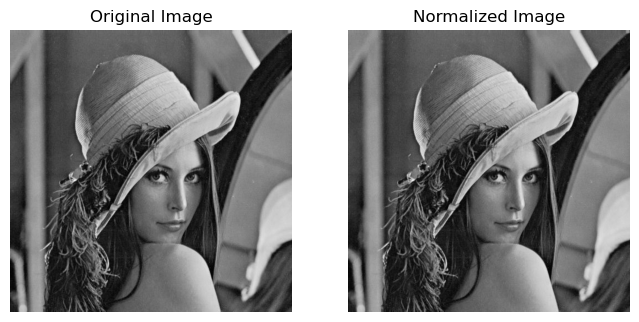

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def converter(img):
    """ Converts the image to floating point and calculate the minimum and maximum pixel.
        Args: image """
    # Convert to floating point
    img_float = img.astype(np.float32)

    # Min-Max Normalization
    min_val = np.min(img_float)
    max_val = np.max(img_float)
    return img_float, min_val, max_val
    
def normalize(img, R = 128):
    """ Normalized the image using the formula round((image_float - min_val) / (max_val - min_val))*R
        Args: img, R = 128 """
    img_float, min_val, max_val = converter(img)
    if max_val - min_val != 0:
        norm_img = np.round((img_float - min_val) / (max_val - min_val) * R)
    else:
        norm_img = np.zeros_like(img_float)
    
    return norm_img.astype(np.uint8)
    
def main():
    # read grayscale image
    g_img = cv2.imread(f"../test_imgs/lena.jpg", cv2.IMREAD_GRAYSCALE)

    if g_img is None:
        print("Error: image not found.")
        return
    
    norm = normalize(g_img)
    
    # Display the images
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(g_img, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(norm, cmap='gray')
    plt.title("Normalized Image")
    plt.axis("off")

    plt.savefig("outimg_problem2.png")
    plt.show()

if __name__ == "__main__":
    main()